In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Liste des constantes**

In [2]:
Lnom = ["IMG_2147.jpeg","IMG_2148.jpeg","IMG_2149 2.jpeg","IMG_2150.jpeg","IMG_2151.jpeg","IMG_2152.jpeg","IMG_2153.jpeg"]

**Lecture d'une images** <br>
fonction qui prend en paramètre un nom d'image et retourne le tableau de pixels de l'image

In [3]:
# Read image from file
def lecture_image(nom_image : str) -> np.ndarray:
    image = cv.imread(f"DataSet/DataSetPostTraitement/{nom_image}",0)
    return image

**Test**
<br> Test de l'algorithme de récupération et de passage en niveau de gris de l'image

In [37]:
img = lecture_image("IMG_2147.jpeg")

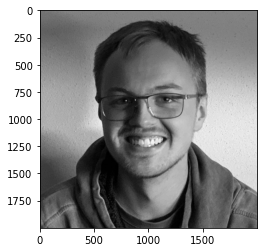

In [38]:
plt.imshow(img,cmap='gray')

**Récupération de l'image** <br>
Récupération de la liste d'image et calcul de l'image moyenne de la liste

In [4]:
Limg = [lecture_image(nom_image) for nom_image in Lnom] #Récupération des images
LimgVect = [img.flatten() for img in Limg] #Véctorisation des images
M = len(Limg)

In [5]:
sumVect = np.add.reduce(LimgVect) #Somme des vecteurs
meanVect = sumVect/M #Moyenne des vecteurs

**Affichage de l'image Moyenne**

In [59]:
meanImg = meanVect.reshape(2000,2000)

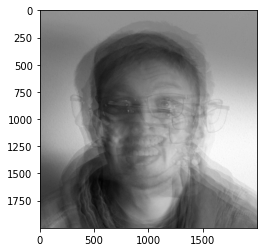

In [60]:
plt.imshow(meanImg,cmap='gray')

**Calcul des vecteurs d'écart à la moyenne**

In [6]:
VectEcart = {nom_image : np.subtract(LimgVect[i],meanVect) for i,nom_image in enumerate(Lnom)} #Vecteur d'écart

**Affichage des Vecteur d'écart** 

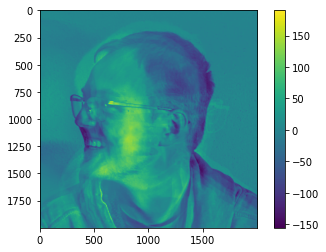

In [67]:
plt.imshow(VectEcart["IMG_2148.jpeg"].reshape(2000,2000),)
plt.colorbar()

In [29]:
A = np.array([VectEcart[nom_image] for nom_image in Lnom]).T #Matrice des vecteurs d'écart

print("La matrice A est de dimension",A.shape)

La matrice A est de dimension (4000000, 7)


**Calcul des valeurs et des vecteurs propre**

In [31]:
matAAT = np.dot(A.T,A) #Matrice AAt
print("La matrice A.AT est de dimension",matAAT.shape)
print(matAAT)

La matrice A.AT est de dimension (7, 7)
[[ 5.43334707e+09  7.53517570e+07 -1.47006878e+09 -1.12031253e+09
  -6.38072345e+08 -1.78455723e+09 -4.95687938e+08]
 [ 7.53517570e+07  6.22253001e+09 -4.95727059e+08 -1.61881949e+09
  -1.59113441e+09 -1.43133271e+09 -1.16086810e+09]
 [-1.47006878e+09 -4.95727059e+08  4.73489020e+09 -1.52795004e+09
  -1.55280795e+09  5.22073653e+08 -2.10410026e+08]
 [-1.12031253e+09 -1.61881949e+09 -1.52795004e+09  3.87469844e+09
   1.68392651e+09 -4.36415708e+08 -8.55127186e+08]
 [-6.38072345e+08 -1.59113441e+09 -1.55280795e+09  1.68392651e+09
   4.69900877e+09 -1.41247799e+09 -1.18844259e+09]
 [-1.78455723e+09 -1.43133271e+09  5.22073653e+08 -4.36415708e+08
  -1.41247799e+09  3.85738953e+09  6.85320453e+08]
 [-4.95687938e+08 -1.16086810e+09 -2.10410026e+08 -8.55127186e+08
  -1.18844259e+09  6.85320453e+08  3.22521539e+09]]


In [28]:
Ai, Vi = np.linalg.eig(matAAT) #Calcul des valeurs propres et vecteurs propres

In [23]:
LVectPropre = [np.dot(A,vi) for vi in Vi] #Vecteurs propres
dictValVectPropre = {Ai[i] : LVectPropre[i] for i in range(len(Ai))} #Dictionnaire des valeurs propres et des vecteurs propres

In [24]:
matUi = np.array([dictValVectPropre[Ai[i]] for i in range(len(Ai))]) #Matrice des vecteurs propres

**Projection des vecteurs d'écart sur l'espace générer par les vecteurs propre**

In [27]:
dictohmegai = {nom : np.dot(matUi,VectEcart[nom]) for nom in VectEcart.keys()} #Vecteur des coordonnées des images dans le repère des vecteurs propres